In [2]:
from pathlib import Path
import cv2
import numpy as np
from matplotlib import pyplot
import os

os.chdir(r"C:\Users\AlexK\Uni-Jena Nextcloud\HELPMI\PNG Scaling Problem")

file_path = 'random mit negativen werten.png'
# Load PNG as bytes and find "sBIT" and NI-Vision "scAl" chunk
png = Path(file_path).read_bytes()
sBIToffset = png.find(b'sBIT')
scAl = png.find(b'scAl') # scAl is a constant offset

if sBIToffset>0:
    # 4 bytes before "sBIT" tell us how many values there are - could be 1-4 values
    nValues = int.from_bytes(png[sBIToffset-4:sBIToffset], byteorder="big")
    values  = list(png[sBIToffset+4:sBIToffset+4+nValues])

offset=0
if scAl>0:
    offset = 65536 - int.from_bytes(png[scAl+4:scAl+6], "big")

if len(values)==1:
    image_src=cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    shift = 16-values[0]
    if shift<16:
        temp=np.zeros(image_src.shape,dtype=np.int16)
        image=(image_src>> shift).astype(np.int16)
    if offset>0:
        image=image-offset
    print(cv2.minMaxLoc(image))
else:
    print("Seems not to be a greyscale image!")



(-1000.0, 1000.0, (275, 0), (83, 1))


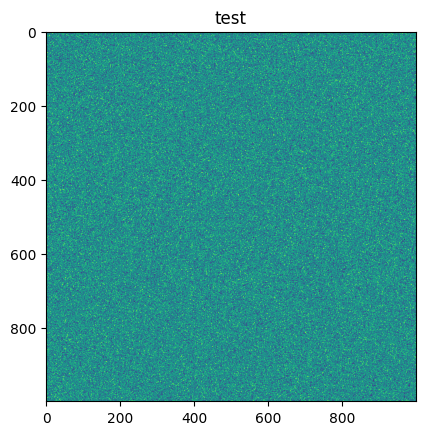

In [3]:
pyplot.imshow(image_src)
pyplot.title("test")
pyplot.show()